In [1]:
# biblioteki i funkcje
import numpy as np
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt


def add_quadratic(arr):
    return np.c_[arr, arr*arr]

def add_constant(arr):
    if len(arr.shape) == 1:
        arr = arr.reshape(-1, 1)
    return np.c_[np.ones(arr.shape[0]), arr]

def get_fucking_data(arr):
    return add_constant(add_quadratic(arr))
    

@np.vectorize
def pico(x):
    return x * (1e-12)

@np.vectorize
def mili(x):
    return x * (1e-3)

In [35]:
# dane
mu0 = 4 * pi * (1e-7)

d = [3.53, 7.05, 10.3, 13.59, 16.49]; d = np.array(d)
C = [126, 69, 48, 39, 34]; C = np.array(C)
Cd = C * d

Dp = mili(19.07)
D = mili(241)

WOOD_Dp = mili(239)
WOOD_d = mili(8.77)
WOOD_C = pico(130)

PCV_Dp = mili(260)
PCV_d = mili(3.10)
PCV_C = pico(368)

PLEXI_Dp = mili(248)
PLEXI_d = mili(9.85)
PLEXI_C = pico(131)

R_AIR = 1.000594


U__Dp = mili(0.05)
U__D = mili(5)

In [36]:
ols  = sm.OLS(Cd, get_fucking_data(d))
model = ols.fit()
model.summary()

/home/wit/miniconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     37.37
Date:                Wed, 27 Apr 2022   Prob (F-statistic):             0.0261
Time:                        17:08:38   Log-Likelihood:                -16.355
No. Observations:                   5   AIC:                             38.71
Df Residuals:                       2   BIC:                             37.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.2677     23.121     18.350      0.003     324.787     523.748
x1             6.6072      5.243      1.260      0.335     -15.952      29.166
x2             0.0932      0.257      0.363      0.752      -1.013       1.200
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.102
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.429
Skew:                           0.608   Prob(JB):                        0.807
Kurtosis:                       2.239   Cond. No.                         822.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

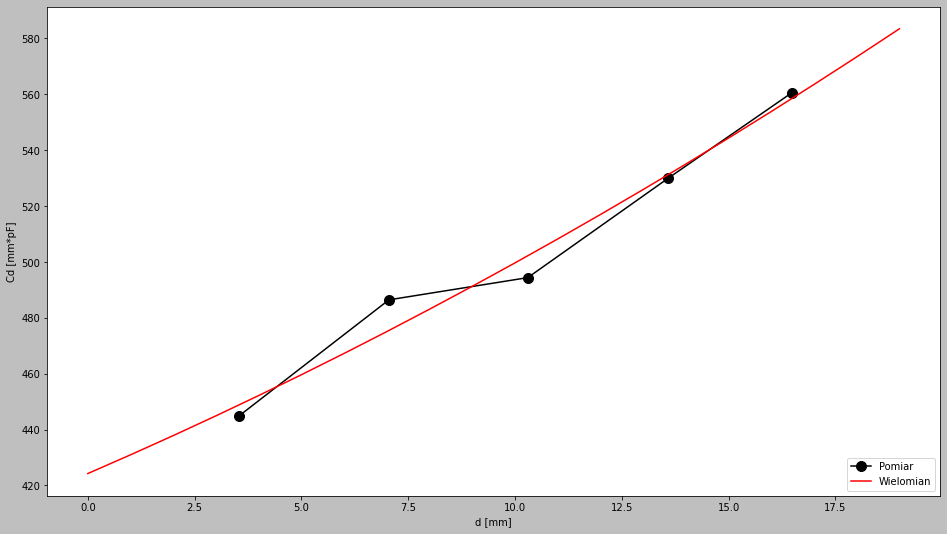

In [38]:
dummy_data = np.arange(0, 20)
pred =  model.predict(get_fucking_data(dummy_data))
plt.style.use("grayscale")
plt.figure(figsize=(16,9))
plt.plot(d, Cd, marker='.', markersize=20, label="Pomiar")
plt.plot(dummy_data, pred, c='r', label="Wielomian")
plt.xlabel("d [mm]")
plt.ylabel("Cd [mm*pF]")
plt.legend(loc="lower right")
plt.savefig("wykres.png")
plt.show()

In [39]:
Cd_extr = 424.2677
Cd_extr = pico(mili(Cd_extr))
U__CD_extr=  pico(mili(23.121))

eps_0 = (4/pi) * (Cd_extr) / (D**2 + 3 * (R_AIR-1)*(Dp**2))
eps_0

9.300604086180238e-12

In [40]:
# Epsilon0
dEps0_dCd_extr = (4/pi) * (1 / ( D**2 + (  3 * (R_AIR-1) * (Dp**2) ) ) )

dEps0_dD = (4 * Cd_extr / pi) * (2*D / (D**2 + 3*(R_AIR-1)*(Dp**2))**2)
dEps0_dDp = (4 * Cd_extr / pi) * (6 * (R_AIR-1)*Dp /   (D**2 + 3 * (R_AIR-1) * (Dp**2)) **2)

U__eps_0 = sqrt(
    (dEps0_dCd_extr * U__CD_extr)**2 +
    (dEps0_dD * U__D)**2 +
    (dEps0_dDp * U__Dp)**2
)
U__eps_0

6.370429492429556e-13

In [41]:
# Prędkość słońca
c = 1 / sqrt(eps_0 * mu0)
c * 1e-6

292.50917251856106

In [55]:
U__c = 0.5 * mu0 * (mu0 * eps_0)**(-1.5) * U__eps_0
U__c / 1e6

10.01767757315487

In [57]:
print("c: ", c/1e6)

c:  292.50917251856106


In [44]:
def er(Dp, d, C):
    return 4 * d * C / (pi * eps_0 * (Dp**2))

U_bigDp = mili(3)
U__d = mili(0.05)
U__C = pico(5)
def u_er(Dp, d, C):
    return sqrt(
        ((4*C / (pi * eps_0 * Dp**2)) * U__d)**2 +
        ((4*d / (pi * eps_0 * Dp**2)) * U__C)**2 +
        ((4*d*C / (pi *eps_0**2 * Dp**2)) * U__eps_0) ** 2+
        ((8 * d * C / (pi * eps_0 * Dp**3)) * U__D) ** 2
    )

In [45]:
er(PLEXI_Dp, PLEXI_d, PLEXI_C)

2.8721236008134494

In [46]:
u_er(PLEXI_Dp, PLEXI_d, PLEXI_C)

0.2536591845286873

In [47]:
u_er(PCV_Dp, PCV_d, PCV_C)

0.18790817003963284

In [48]:
u_er(WOOD_Dp, WOOD_d, WOOD_C)

0.2436906756468596

In [51]:
# sprawdzanie zmiennych
print("Epsilon 0: ", eps_0)
print("Print U(eps0)", 2* U__eps_0)

Epsilon 0:  9.300604086180238e-12
Print U(eps0) 1.2740858984859113e-12


In [59]:
print("U(c)",2 *  U__c / 1e6)
print("c", c / 1e6)

U(c) 20.03535514630974
c 292.50917251856106


In [68]:
print("U(Drewno)", 3 * u_er(WOOD_Dp, WOOD_d, WOOD_C))
print("Drewno", er(WOOD_Dp, WOOD_d, WOOD_C))
3 - 2.73

U(Drewno) 0.7310720269405788
Drewno 2.73241150288386


0.27

In [69]:
print("U(PCV)", 3 * u_er(PCV_Dp, PCV_d, PCV_C))
print("PCV", er(PCV_Dp, PCV_d, PCV_C))
2.8 - 2.31

U(PCV) 0.5637245101188986
PCV 2.310264888552624


0.48999999999999977

In [72]:
print("U(PLEXI)", 3 * u_er(PLEXI_Dp, PLEXI_d, PLEXI_C))
print("PLEXI", er(PLEXI_Dp, PLEXI_d, PLEXI_C))

U(PLEXI) 0.7609775535860619
PLEXI 2.8721236008134494
